In [1]:
import operator
from math import log
from collections import Counter
from pprint import pprint

import DecisionTreePlot as dtPlot


In [2]:
def createDataSet():
    dataSet = [
        [1, 1, 'yes'],
        [1, 1, 'yes'],
        [1, 0, 'no'],
        [0, 1, 'no'],
        [0, 1, 'no']
    ]

    labels = ['no surfacing', 'flippers']

    return dataSet, labels

In [3]:
createDataSet()

([[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']],
 ['no surfacing', 'flippers'])

In [4]:
def calShannonEnt(dataset):
    numEntries = len(dataset)
    labelCounts = {}
    for featVec in dataset:
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        
        labelCounts[currentLabel] += 1

    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key]) / numEntries
        shannonEnt -= prob * log(prob, 2)
    
    return shannonEnt

In [5]:
def splitDataSet(dataset, idx, value):
    retDataSet = []
    for featVect in dataset:
        if featVect[idx] == value:
            reducedFeatVec = featVect[:idx]
            reducedFeatVec.extend(featVect[idx+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet

In [6]:
def chooseBestFeatureToSplit(dataset):
    numFeatures = len(dataset[0]) - 1
    baseEntropy = calShannonEnt(dataset)
    bestInfoGain, bestFeature = 0.0, -1
    for i in range(numFeatures):
        featList = [ example[i] for example in dataset ]
        uniqueVals = set(featList)
        newEntropy = 0.0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataset, i, value)
            prob = len(subDataSet) / float(len(dataset))
            newEntropy += prob * calShannonEnt(subDataSet)

        infoGain = baseEntropy - newEntropy
        pprint(f'infoGain={infoGain}, bestFeature={i} {baseEntropy} {newEntropy}')
        if infoGain > bestInfoGain:
            bestInfoGain = infoGain
            bestFeature = i

    return bestFeature

In [7]:
def majorityCnt(classList):
    classCnt = {}
    for vote in classList:
        if vote not in classCnt.keys():
            classCnt[vote] = 0
        
        classCnt[vote] += 1
    
    sortedClassCnt = sorted(classCnt.items(), key=operator.itemgetter(1), reverse=True)

    return sortedClassCnt[0][0]


In [8]:
def createTree(dataset, labels):
    classList = [ example[-1] for example in dataset ]
    if classList.count(classList[0]) == len(classList):
        return classList[0]

    if len(dataset[0]) == 1:
        return majorityCnt(classList)

    bestFeat = chooseBestFeatureToSplit(dataset)
    bestFeatLabel = labels[bestFeat]
    myTree = { bestFeatLabel: {} }
    del(labels[bestFeat])
    featValues = [ example[bestFeat] for example in dataset ]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:]
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataset, bestFeat, value), subLabels)
    
    return myTree

In [9]:
def classify(inputTree, featLabels, testVec):
    firstStr = list(inputTree.keys())[0]
    secondDict = inputTree[firstStr]
    featIdx = featLabels.index(firstStr)
    key = testVec[featIdx]
    valueOfFeat = secondDict[key]
    pprint(f'+++ {firstStr} xxx {secondDict} --- {key} >>> {valueOfFeat}')
    if isinstance(valueOfFeat, dict):
        classLabel = classify(valueOfFeat, featLabels, testVec)
    else:
        classLabel = valueOfFeat

    return classLabel

In [10]:
def storeTree(inputTree, filename):
    import pickle

    with open(filename, 'wb') as f:
        pickle.dump(inputTree, f)

In [11]:
def grabTree(filename):
    import pickle

    f = open(filename, 'rb')
    return pickle.load(f)

In [12]:
def fishTest():
    myData, labels = createDataSet()

    import copy

    myTree = createTree(myData, copy.deepcopy(labels))
    pprint(myTree)
    pprint(classify(myTree, labels, [1, 1]))

    dtPlot.createPlot(myTree)

In [13]:
def contactLensesTest():
    with open('../../datasets/3.DecisionTree/lenses.txt') as f:
        lenses = [ inst.strip().split('\t') for inst in f.readlines() ]
        lensesLabels = ['age', 'prescript', 'astigmatic', 'tearRate']
        lensesTree = createTree(lenses, lensesLabels)
        pprint(lensesTree)
        dtPlot.createPlot(lensesTree)

('infoGain=0.4199730940219749, bestFeature=0 0.9709505944546686 '
 '0.5509775004326937')
'infoGain=0.17095059445466854, bestFeature=1 0.9709505944546686 0.8'
'infoGain=0.9182958340544896, bestFeature=0 0.9182958340544896 0.0'
{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}
("+++ no surfacing xxx {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}} --- 1 "
 ">>> {'flippers': {0: 'no', 1: 'yes'}}")
"+++ flippers xxx {0: 'no', 1: 'yes'} --- 1 >>> yes"
'yes'


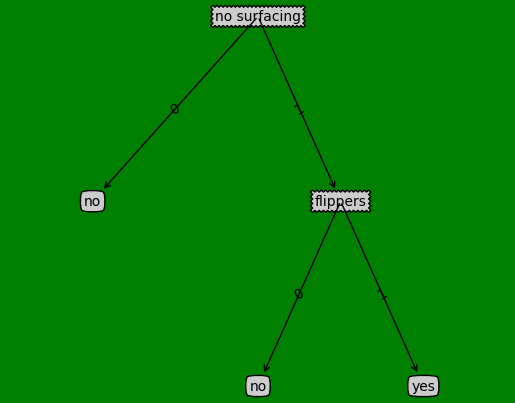

In [14]:
fishTest()

('infoGain=0.03939650364612124, bestFeature=0 1.3260875253642983 '
 '1.286691021718177')
('infoGain=0.039510835423565815, bestFeature=1 1.3260875253642983 '
 '1.2865766899407325')
('infoGain=0.37700523001147723, bestFeature=2 1.3260875253642983 '
 '0.9490822953528211')
('infoGain=0.5487949406953986, bestFeature=3 1.3260875253642983 '
 '0.7772925846688997')
('infoGain=0.22125183600446618, bestFeature=0 1.5545851693377994 '
 '1.3333333333333333')
('infoGain=0.09543725231055489, bestFeature=1 1.5545851693377994 '
 '1.4591479170272446')
('infoGain=0.7704260414863776, bestFeature=2 1.5545851693377994 '
 '0.7841591278514218')
('infoGain=0.3166890883150208, bestFeature=0 0.6500224216483541 '
 '0.3333333333333333')
('infoGain=0.19087450462110933, bestFeature=1 0.6500224216483541 '
 '0.4591479170272448')
'infoGain=1.0, bestFeature=0 1.0 0.0'
('infoGain=0.2516291673878229, bestFeature=0 0.9182958340544896 '
 '0.6666666666666666')
('infoGain=0.4591479170272448, bestFeature=1 0.9182958340544896 '


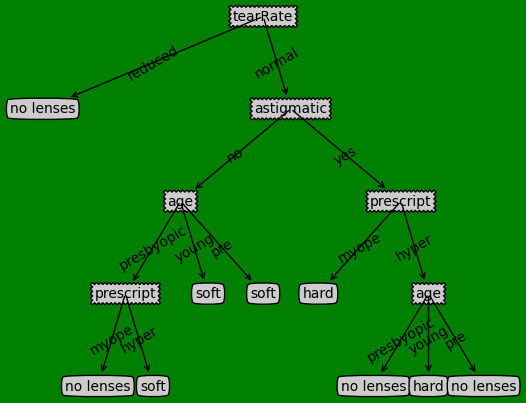

In [15]:
contactLensesTest()